<a href="https://colab.research.google.com/github/FGalvao77/-Pipeline-Automatize-as-etapas-de-Machine-Learning/blob/main/(Pipeline)_Automatize_as_etapas_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **(`Pipelines`) Automatize as etapas de Machine Learning**

**Mas afinal, o que é pipeline de ML?**

Um pipeline de Machine Learning é um fluxo de trabalho executável de forma independente de uma tarefa completa de aprendizado de máquina. As subtarefas são encapsuladas como uma série de etapas no pipeline. 

Os pipelines devem se concentrar em tarefas de aprendizado de máquina, como:

- Preparação de dados, incluindo importação, validação e limpeza, mudanças irreversíveis e transformação, normalização e preparo dos dados;
- Configuração de treinamento, incluindo argumentos de parametrização, filePaths e configurações de log/relatório;
- Treinamento e validação de forma eficiente e repetida. 
    - A eficiência pode vir da especificação de subconjuntos de dados específicos, diferentes recursos de computação de hardware, processamento distribuído e monitoramento de progresso.
- Implantação, incluindo controle de versão, dimensionamento, provisionamento e controle de acesso.

As etapas independentes permitem que vários cientistas de dados funcionem no mesmo pipeline ao mesmo tempo, sem sobrecarregar os recursos de computação. As etapas separadas também facilitam o uso de diferentes tipos/tamanhos de computação para cada etapa.

Depois que o pipeline é criado, muitas vezes, há mais ajustes finos no loop de treinamento do pipeline. Quando você executa novamente um pipeline, a execução pula para as etapas que precisam executar novamente, como um script de treinamento atualizado. As etapas que não precisam ser executadas novamente são ignoradas.



Então vamos ver na prática quais são as etapas de um projeto de machine learning e como podemos otimiza-las.

## **Fluxo de Processos de Machine Learning**

- Pipelines permitem automatizar os fluxos de processos em seus projetos de machine learning.

- Reduzimos a quantidade de código.

- Menos risco de erros.

In [1]:
# instale o category_encoders
!pip install category_encoders

In [2]:
# importando a biblioteca para ignorar "erros"
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# importando as bibliotecas necessárias
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from category_encoders import OneHotEncoder

## **1° Etapa: Obtendo os dados.**

Para atividade prática utlizaremos o dataset `adult`.

Esse é um dataset bem famoso e está disponível em [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult), onde a tarefa é prever se uma pessoa recebe `> 50K ou <= 50K` ao ano com base em algumas características.

Portanto, este é um problema de classificação.

In [4]:
# # realizando o carregamento do conjunto de dados para google colab
# from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
# uploaded = files.upload()

In [5]:
# realizando o carregamento da base de dados direto da url
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2021-11-20 22:48:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.4’

adult.data.4        100%[===================>]   3.79M  9.24MB/s    in 0.4s    

2021-11-20 22:48:11 (9.24 MB/s) - ‘adult.data.4’ saved [3974305/3974305]



In [6]:
# carregando a base de dados
df = pd.read_csv('/content/adult.data')

In [7]:
# visualizando as 5 primeiras linhas
df.head().T

,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


In [8]:
# visualizando as colunas presente 
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

**O arquivo não possui o `header` (nome das colunas).**


In [9]:
# visualizando os índices - ínicio e fim
df.index

RangeIndex(start=0, stop=32560, step=1)

Devido à falta dos nomes das colunas, irei instanciar manualmente para poder prosseguir na atividade prática.

_Os nomes peguei do próprio site_ `UCI Machine Learning Repository`.


In [10]:
# instanciando manualmente os nomes das colunas
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'matital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income']

In [11]:
# verificando se os nomes instanciados e igual a quantidade de colunas no df
print(len(headers))
print(len(df.columns))

15
15


In [12]:
# realizando comparação boleana entre os objetos
print([len(headers)] == [len(df.columns)])

True


In [13]:
# carregando novamente a base de dados e agregando seus headers
df = pd.read_csv('/content/adult.data', names=headers)

In [14]:
# visualizando as 5 primeiras linhas da base de dados
df.head()

,age,workclass,fnlwgt,education,education-num,matital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# nomes das colunas
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'matital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [16]:
# índices
df.index

RangeIndex(start=0, stop=32561, step=1)

In [17]:
# verificando a dimensão da base de dados - linhas e colunas
df.shape

(32561, 15)

In [18]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   matital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## **2° Etapa: Limpeza, Preparação e Manipulação dos dados.**

In [19]:
# visualizando a base de dados
df

,age,workclass,fnlwgt,education,education-num,matital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
# visualizando somente os atributos "education" e "education-num"
df[['education', 'education-num']].head(10)

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [21]:
# contabilizando as instâncias únicas no atributo "education"
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [22]:
# contabilizando as instâncias únicas no atributo "education-num"
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

> Irei remover o atributo `education`, já que o mesmo traz o título de educação, portanto uma informação categórica e, o atributo `education-num` possui informações sobre a quantidade de anos de estudo. Portanto, informações redundante.

Como os modelos de machine learning trabalham melhor com dados numéricos, a prioridade é manter a coluna que tem o tipo de dados _int_ ou _float_.

In [23]:
# removendo o atributo "education"
df.drop(['education'], axis =1, inplace=True)

In [24]:
# separando as variáves explicativas (X) e da resposta (y)
X = df.drop('income', axis=1, inplace=False)
y = df.income

In [25]:
# visualizando o objeto "X"
X.head()

,age,workclass,fnlwgt,education-num,matital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [26]:
# visualizando o objeto "y"
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

No X temos as variáveis que representam as características das pessoas, e na variável y temos a classe que queremos prever, nesse caso o `income` (renda).

In [27]:
# separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

Vamos separar as colunas onde os dados são categóricos, pois essas colunas precisam de um tratamento especial.

In [28]:
# selecionar as colunas não numéricas
df.select_dtypes(include='object')

,workclass,matital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


Como já é de conhecimento, os modelos de machine learning não trabalham com dados categóricos, então precisamos transformar esses dados para entregar para o algoritmo. 

É o que faremos a seguir!

## **Aplicando One Hot Encoder**

- Documentação:
 - [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=one%20hot#sklearn.preprocessing.OneHotEncoder)

> É uma técnica que vai gerar vetores binários para cada categoria.

Exemplo:

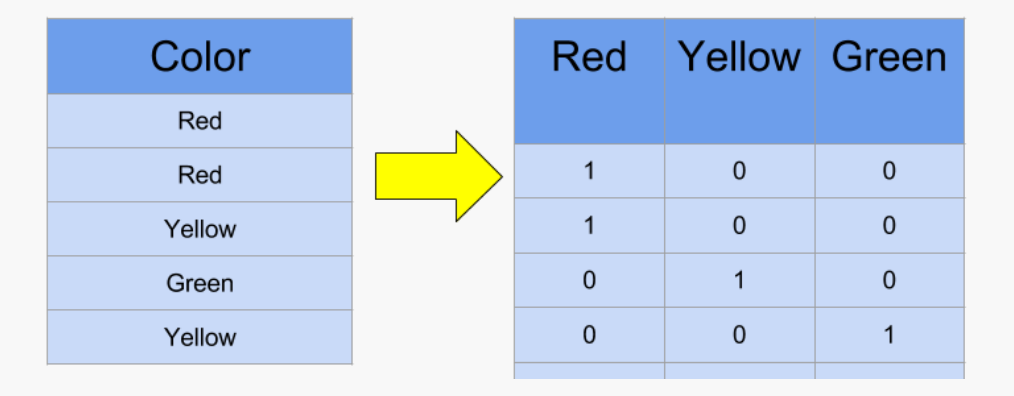

Depois de aplicar o `one hot encoder` teremos um novo DataFrame onde cada valor único da tabela **Color** vira uma coluna, se temos uma cor red essa coluna será representada com o valor 1 e as demais com o valor 0 e assim sucessivamente para todas as instâncias presentes no atributo.

In [29]:
# instanciando o "one hot encoder"
ohe = OneHotEncoder(use_cat_names=True)

> Passando o argumento `use_cat_names=True`, ele colocará o nome de cada categoria no início de cada atributo.

In [30]:
# aplicando-o e realizando a transformação da base de treino
X_train = ohe.fit_transform(X_train)

In [31]:
# visualizando o resultado do one hot encoder
X_train.head()

,age,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Local-gov,workclass_ Private,workclass_ Federal-gov,workclass_ ?,workclass_ Self-emp-inc,workclass_ Without-pay,workclass_ Never-worked,fnlwgt,education-num,matital-status_ Married-civ-spouse,matital-status_ Divorced,matital-status_ Never-married,matital-status_ Separated,matital-status_ Widowed,matital-status_ Married-spouse-absent,matital-status_ Married-AF-spouse,occupation_ Farming-fishing,occupation_ Craft-repair,occupation_ Prof-specialty,occupation_ Exec-managerial,occupation_ Priv-house-serv,occupation_ Sales,occupation_ Transport-moving,occupation_ Other-service,occupation_ Adm-clerical,occupation_ Machine-op-inspct,occupation_ Handlers-cleaners,occupation_ ?,occupation_ Tech-support,occupation_ Protective-serv,occupation_ Armed-Forces,relationship_ Wife,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Other-relative,...,native-country_ Jamaica,native-country_ Germany,native-country_ Mexico,native-country_ Cuba,native-country_ Philippines,native-country_ Haiti,native-country_ India,native-country_ France,native-country_ Puerto-Rico,native-country_ El-Salvador,native-country_ ?,native-country_ Portugal,native-country_ Taiwan,native-country_ Columbia,native-country_ Peru,native-country_ Thailand,native-country_ England,native-country_ Italy,native-country_ South,native-country_ Dominican-Republic,native-country_ Scotland,native-country_ Poland,native-country_ China,native-country_ Yugoslavia,native-country_ Nicaragua,native-country_ Vietnam,native-country_ Ecuador,native-country_ Canada,native-country_ Ireland,native-country_ Cambodia,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Japan,native-country_ Hong,native-country_ Trinadad&Tobago,native-country_ Hungary,native-country_ Honduras,native-country_ Iran,native-country_ Laos,native-country_ Holand-Netherlands,native-country_ Greece
19749,34,1,0,0,0,0,0,0,0,0,56460,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1216,48,1,0,0,0,0,0,0,0,0,243631,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27962,23,0,1,0,0,0,0,0,0,0,56402,10,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23077,56,0,0,1,0,0,0,0,0,0,255406,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10180,17,0,0,0,1,0,0,0,0,0,297246,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Aplicando o StandardScaler (pré-processador)**

- Documentação:    
 - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler)

> O `StandardScaler` executa a tarefa de padronização dos dados, ou seja, transforma todas todas as instâncias presente nos atributos, para que elas fiquem em uma mesma escala. Cada coluna vai ter média igual a 0 e desvio padrão igual a 1.

In [32]:
# instanciando o "StandardScaler"
scaler = StandardScaler(copy=True,
                        with_mean=True, with_std=True).fit(X_train)

In [33]:
# StandardScaler(copy=True,
#                with_mean=True, with_std=True)

# visualizando o objeto
scaler

StandardScaler()

In [34]:
# aplicando o objeto e realizando a transformação dos dados de treino
data_scaled = scaler.transform(X_train)

In [35]:
# visualizando os valores escalonados da primeira linha
data_scaled[:1]

array([[-0.33477088,  3.41912608, -0.20497627, -0.26017496, -1.51605017,
        -0.17389658, -0.24261449, -0.19035627, -0.02095097, -0.01752768,
        -1.26129178, -0.42321894,  1.0796835 , -0.39602635, -0.69969697,
        -0.17905142, -0.17576233, -0.11112098, -0.02811361,  5.61782876,
        -0.3809153 , -0.38136826, -0.3785707 , -0.06900047, -0.3573552 ,
        -0.2233543 , -0.33331708, -0.36287498, -0.25921243, -0.20980937,
        -0.24332334, -0.17106433, -0.13801003, -0.01622712,  4.47936324,
        -0.8291841 , -0.58120066, -0.42945396, -0.34394251, -0.17918188,
         0.41684087, -0.09526813, -0.3292394 , -0.18420677, -0.09217144,
         1.42324299, -1.42324299, -0.14634899,  5.13611784, -2.30985135,
         0.34537657, -0.04545754, -0.04962917, -0.06469602, -0.14478945,
        -0.05347929, -0.08056984, -0.03749634, -0.05510509, -0.03036817,
        -0.06118283, -0.05784168, -0.13450225, -0.03507153, -0.03921719,
        -0.04497036, -0.03108349, -0.02197404, -0.0

In [36]:
# sobrescreendo os dados de treino com os dados escalonados
X_train = scaler.transform(X_train)

# visualizando 
X_train

array([[-0.33477088,  3.41912608, -0.20497627, ..., -0.02295164,
        -0.00662397, -0.03036817],
       [ 0.69122318,  3.41912608, -0.20497627, ..., -0.02295164,
        -0.00662397, -0.03036817],
       [-1.14090907, -0.2924724 ,  4.87861358, ..., -0.02295164,
        -0.00662397, -0.03036817],
       ...,
       [-1.50733552, -0.2924724 , -0.20497627, ..., -0.02295164,
        -0.00662397, -0.03036817],
       [ 0.83779376,  3.41912608, -0.20497627, ..., -0.02295164,
        -0.00662397, -0.03036817],
       [-0.33477088, -0.2924724 , -0.20497627, ..., -0.02295164,
        -0.00662397, -0.03036817]])

## **3° Etapa: Treinando o modelo.**

Como primeiro modelo iremos aplicar a árvore de decisão.

In [37]:
# instanciando o modelo
clf_tree = DecisionTreeClassifier()

In [38]:
# passando para o modelo os dados de treino 
clf_tree = clf_tree.fit(X_train, y_train)

É necessário aplicar todos os métodos acima para os dados de teste, garantindo que eles estejam no mesmo formato do dados de treino, caso contrário o modelo não será capaz de prever novos resultados ou essa previsão será muito ruim.

**Aplicando o OHE e o Standard Scaler (Pré-processador) nos dados de teste**

In [39]:
# aplicando as transformaçẽos na base de testes
X_test = ohe.transform(X_test)                  # aplicando a transformação dos dados categóricos
scaler_test = StandardScaler().fit(X_test)      # aplicando a normalização dos dados
X_test = scaler_test.transform(X_test)          # instanciando o resultado na base de teste

In [40]:
# visualizando a base de teste após os tratamentos realizados
X_test

array([[-0.85215028, -0.28732843, -0.20090318, ..., -0.02479043,
         0.        , -0.02862845],
       [ 0.4686297 , -0.28732843,  4.97752203, ..., -0.02479043,
         0.        , -0.02862845],
       [-0.70539695, -0.28732843, -0.20090318, ..., -0.02479043,
         0.        , -0.02862845],
       ...,
       [-1.07228028, -0.28732843, -0.20090318, ..., -0.02479043,
         0.        , -0.02862845],
       [ 1.27577303, -0.28732843, -0.20090318, ..., -0.02479043,
         0.        , -0.02862845],
       [ 0.39525304, -0.28732843, -0.20090318, ..., -0.02479043,
         0.        , -0.02862845]])

In [41]:
# realizando as previsões com o modelo
clf_tree.predict(X_test)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype=object)

## **4°Etapa: Validação do modelo.**

In [42]:
# iremos utilizar como métrica de avaliação a acurácia
acc = clf_tree.score(X_test, y_test)
acc

0.8021291841539564

## **5°Etapa: Nessa etapa é feita a melhora do modelo, geralmente você vai fazer melhorias nas etapas anteriores, repetindo esse ciclo quantas vezes for necessário.**

**Criando Pipelines**

- Encadeia etapas em sequencia.

- Aplicação das etapas em dados de treino e teste

In [43]:
# 1 exemplo de pipeline
pip_1 = Pipeline([
                  ('ohe', OneHotEncoder()),
                  ('scaler', StandardScaler()),
                  ('clf', DecisionTreeClassifier())
])

In [44]:
# visualizando as etapas do pipeline
pip_1.steps

[('ohe', OneHotEncoder()),
 ('scaler', StandardScaler()),
 ('clf', DecisionTreeClassifier())]

> Perceba que nesse único processo executamos o one hot encoder, o standardscaler e instanciamos o modelo.

**Fluxo de processos com Pipeline**

Agora vamos separar os dados de treino e teste e depois vamos aplicar o pipeline criado acima. Observe como tudo fica bem mais simples.

In [45]:
# particionando os dados em treino e teste
X_train, X_test, Y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=42)

In [46]:
# treinando o 1 pipeline nos dados de treino
pip_1.fit(X_train, y_train)

Pipeline(steps=[('ohe',
                 OneHotEncoder(cols=['workclass', 'matital-status',
                                     'occupation', 'relationship', 'race',
                                     'sex', 'native-country'])),
                ('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

**Validação do modelo**

In [47]:
# avaliando a acurácia do modelo
acc = pip_1.score(X_test, y_test)
acc

0.8108301770907974

**Criando outros Pipelines**

- Crie pipelines com configurações distintas.

- Valide vários modelos.

In [48]:
# importando o módulo
from sklearn.preprocessing import MinMaxScaler

In [49]:
# pipeline com o pré-processador "MinMaxScaler"
pip_minmax =  Pipeline([
                        ('ohe', OneHotEncoder()),
                        ('min_max_scaler', MinMaxScaler()),
                        ('clf', DecisionTreeClassifier())
])

In [50]:
# pipeline com o pré-processador MinMaxScaler e passando como argumento 
# no classificador como "max_depth = 3" (profundidade máxima da árvore)
pip_max_depth = Pipeline([
                          ('ohe', OneHotEncoder()),
                          ('min_max_scaler', MinMaxScaler()),
                          ('clf', DecisionTreeClassifier(max_depth=3))
])

In [51]:
# pipeline com o pré-processador StandardScaler e também passando
# o classificador como "max_depth = 3" (profundidade máxima da árvore)
pip_max_depth_std = Pipeline([
                              ('ohe', OneHotEncoder()),
                              ('standerScaler', StandardScaler()),
                              ('clf', DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
])

**Validando modelos**

In [52]:
# aplicando o pipeline com o pré-processador "MinMaxScaler"
pip_minmax.fit(X_train, y_train)
acuracia = pip_minmax.score(X_test, y_test)
acuracia

0.8122632818098066

In [53]:
# aplicando o pipeline com o pré-processador "MinMaxScaler"
# e classificador com "max_depth = 3" (profundidade máxima da árvore)
pip_max_depth.fit(X_train, y_train)
acuracia = pip_max_depth.score(X_test, y_test)
acuracia

0.8445081379875116

In [54]:
# aplicando o pipeline com o pré-processador "StandardScaler"
# e classificador com "max_depth = 3" (profundidade máxima da árvore)
pip_max_depth_std.fit(X_train, y_train)
acuracia = pip_max_depth_std.score(X_test, y_test)
acuracia

0.8211690039922203

**Processando colunas distintas**

In [55]:
# visualizando
X.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education-num,13,13,9,7,13
matital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female
capital-gain,2174,0,0,0,0


Podemos criar pipelines para que certas tarefas sejam aplicadas somente em determinadas colunas e não no conjunto de dado completo.

Não é o caso aqui, mas vamos supor que as colunas education-num e race tem valores faltantes, então vamos criar um pipeline para automatizar o preenchimento desses valores.

In [56]:
# importando as bibliotecas
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

**Pipeline com etapa de preenchimento de valores ausentes pela mediana.**

In [57]:
# preencher valores faltantes com a mediana
mediana = Pipeline(steps=[
                          ('mediana', SimpleImputer(strategy='median'))
])

**Pipeline com etapa de preenchimento de valores ausentes pelo valor mais frequente.**

In [58]:
# preencher valores faltantes com o valor mais frequente
frequente = Pipeline(steps=[
                            ('frequente', SimpleImputer(strategy='most_frequent'))
])

**Criação do Pipeline que compõem os outros dois.**

Aqui estamos encadeando os dois pipelines criados acima.

In [59]:
# criando um pipeline para imputação de dados e cada coluna distinta
data_cleaning = ColumnTransformer(transformers=[
                                                ('mediana', mediana, ['education-num']),
                                                ('frequent', frequente, ['race'])
])

**Pipeline Final.**

In [60]:
# criando a versão final do pipeline
pipeline_final = Pipeline([
                           ('datacleaning', data_cleaning),         # primeira etapa do pipeline é o data_cleaning
                           ('ohe', OneHotEncoder()),                # aplicação de ohe nos dados
                           ('standerScaler', StandardScaler()),     # pré-processamento de dados com o StandardScaler
                           ('tree', DecisionTreeClassifier())       # instanciando o modelo de árvore de decisão
])

In [61]:
# passando os dados de treino para o pipeline final
pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('datacleaning',
                 ColumnTransformer(transformers=[('mediana',
                                                  Pipeline(steps=[('mediana',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['education-num']),
                                                 ('frequent',
                                                  Pipeline(steps=[('frequente',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['race'])])),
                ('ohe', OneHotEncoder(cols=[0, 1])),
                ('standerScaler', StandardScaler()),
                ('tree', DecisionTreeClassifier())])

In [62]:
# realizando as previsões
pipeline_final.predict(X_test)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [63]:
# visualizando acurácia do modelo
acuracia = pipeline_final.score(X_test, y_test)
acuracia

0.781553894973897

**Grid Search e Pipelines**

O Grid Search faz uma busca em gride para encontrar os melhores parâmetros do modelo.

In [64]:
# importando a biblioteca
from sklearn.model_selection import GridSearchCV

In [65]:
# parâmetros para fazer o grid
params_grid = dict(tree__max_depth=[3,4,5,6,7,8,9,10])
params_grid

{'tree__max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}

In [66]:
# instanciando o objeto grid com os parâmetros: pipeline_final, params_grid
# e configurando a validação cruzada com 5 folds
grid = GridSearchCV(pipeline_final, params_grid,
                    cv=5, scoring='accuracy', )

Aqui o nosso modelo vai ser o pipeline final, tratando os valores ausentes (como exemplo), fazendo o one hot encoder e colocando os dados em uma mesma escala.

In [67]:
# aplicando o objeto "grid" nos dados de treino
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('datacleaning',
                                        ColumnTransformer(transformers=[('mediana',
                                                                         Pipeline(steps=[('mediana',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['education-num']),
                                                                        ('frequent',
                                                                         Pipeline(steps=[('frequente',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['race'])])),
                                       ('ohe', OneHotEncoder(cols=[0, 1])),
                                   

In [68]:
# visualizando a lista de parâmetros
grid.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'datacleaning', 'ohe', 'standerScaler', 'tree', 'datacleaning__n_jobs', 'datacleaning__remainder', 'datacleaning__sparse_threshold', 'datacleaning__transformer_weights', 'datacleaning__transformers', 'datacleaning__verbose', 'datacleaning__verbose_feature_names_out', 'datacleaning__mediana', 'datacleaning__frequent', 'datacleaning__mediana__memory', 'datacleaning__mediana__steps', 'datacleaning__mediana__verbose', 'datacleaning__mediana__mediana', 'datacleaning__mediana__mediana__add_indicator', 'datacleaning__mediana__mediana__copy', 'datacleaning__mediana__mediana__fill_value', 'datacleaning__mediana__mediana__missing_values', 'datacleaning__mediana__mediana__strategy', 'datacleaning__mediana__mediana__verbose', 'datacleaning__frequent__memory', 'datacleaning__frequent__steps', 'datacleaning__frequent__verbose', 'datacleaning__frequent__frequente', 'datacleaning__frequent__frequente__add_indicator', 'datacleaning__frequent__frequente__copy', '

**Resultados**

In [69]:
# visualizando o resultado do modelo
grid.cv_results_

{'mean_fit_time': array([0.11721387, 0.10776248, 0.10908451, 0.1095643 , 0.11298046,
        0.1139008 , 0.11304517, 0.11305346]),
 'mean_score_time': array([0.0280499 , 0.02652721, 0.02645574, 0.02796211, 0.02851458,
        0.02859235, 0.02849135, 0.02806153]),
 'mean_test_score': array([0.77215683, 0.7781678 , 0.7781678 , 0.7781678 , 0.7781678 ,
        0.77808004, 0.77808004, 0.77808004]),
 'param_tree__max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'tree__max_depth': 3},
  {'tree__max_depth': 4},
  {'tree__max_depth': 5},
  {'tree__max_depth': 6},
  {'tree__max_depth': 7},
  {'tree__max_depth': 8},
  {'tree__max_depth': 9},
  {'tree__max_depth': 10}],
 'rank_test_score': array([8, 1, 1, 1, 1, 5, 5, 5], dtype=int32),
 'split0_test_score': array([0.77407326, 0.77889888, 0.77889888, 0.77889888, 0.77889888,
        0.77889888, 0.778898

In [70]:
# visualizando o melhor parâmetro de profundidade da árvore
grid.best_params_

{'tree__max_depth': 4}

> Nosso melhor modelo foi com o `max_depth = 4`.

In [71]:
# visualizando o score do modelo
grid.best_score_

0.778167800629858

Esse modelo obteve uma acurácia de 78% aproximadamente.

Você deve está se perguntando, já obtemos uma acurácia de 0.80 anteriormente e agora a nossa acurácia é de 0.78, não devemos considerar o modelo anterior?

Sugiro que leia o artigo de árvore de decisão https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/, onde é explicado que esse algoritmo está propenso a sofrer `overfitting (sobreajuste)`, e uma das maneiras de resolver isso é fazendo o **cross validation**. A acurácia é menor mas garantimos que a performance do modelo será boa quando ele for apresentado a novos dados.
- **Esse artigo também está disponível em formato de vídeo:**
 - https://youtu.be/V4svMrIjp7s



**Vamos realizar outros testes com o Grid Search e os Pipelines**

In [72]:
# definindo outros parâmetros
import numpy as np

# params = {'tree__max_depth': np.arange(0, 20)}
# params

params = {'tree__max_depth': range(0, 10)}
params

{'tree__max_depth': range(0, 10)}

In [73]:
# instanciando o objeto grid com os parâmetros
# e configurando a validação cruzada com 5 folds
grid2 = GridSearchCV(pipeline_final,
                    param_grid=params,
                    cv=5, scoring='accuracy', )

In [74]:
# aplicando o modelo
grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('datacleaning',
                                        ColumnTransformer(transformers=[('mediana',
                                                                         Pipeline(steps=[('mediana',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['education-num']),
                                                                        ('frequent',
                                                                         Pipeline(steps=[('frequente',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['race'])])),
                                       ('ohe', OneHotEncoder(cols=[0, 1])),
                                   

In [75]:
# visualizando o melhor parâmetro
grid2.best_params_

{'tree__max_depth': 4}

In [76]:
# visualizando o resultado
grid2.cv_results_

{'mean_fit_time': array([0.10678301, 0.10751357, 0.10568309, 0.10684953, 0.11000066,
        0.10652838, 0.11289392, 0.11131392, 0.10998902, 0.11494107]),
 'mean_score_time': array([0.        , 0.02720556, 0.02665954, 0.02793212, 0.02682443,
        0.02697992, 0.02739367, 0.02611747, 0.02659521, 0.02912207]),
 'mean_test_score': array([       nan, 0.75833634, 0.76395229, 0.77215683, 0.7781678 ,
        0.7781678 , 0.7781678 , 0.7781678 , 0.77808004, 0.77808004]),
 'param_tree__max_depth': masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'tree__max_depth': 0},
  {'tree__max_depth': 1},
  {'tree__max_depth': 2},
  {'tree__max_depth': 3},
  {'tree__max_depth': 4},
  {'tree__max_depth': 5},
  {'tree__max_depth': 6},
  {'tree__max_depth': 7},
  {'tree__max_depth': 8},
  {'tree__max_depth': 9}],
 'rank_test_score': a

In [77]:
# score final
grid2.best_score_

0.778167800629858

In [78]:
# realizando as previsões
grid2.predict(X_test)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [79]:
# visualizando acurácia do modelo
acuracia = grid2.score(X_test, y_test)
acuracia

0.7817586242194697

In [80]:
# criando a versão final do pipeline
pipeline_final = Pipeline([
                           ('datacleaning', data_cleaning),                          # primeira etapa do pipeline é o data_cleaning
                           ('ohe', OneHotEncoder()),                                 # aplicação de ohe nos dados
                           ('stdscal', StandardScaler()),                            # pré-processamento de dados com o StandardScaler
                           ('tree', DecisionTreeClassifier(class_weight='balanced')) # instanciando o modelo de árvore de decisão 
])

In [81]:
params = {'tree__max_depth': range(0, 10)}

In [82]:
grid_final = GridSearchCV(pipeline_final, param_grid= params,
                    cv=5, scoring='accuracy')

In [83]:
# aplicando o modelo
grid_final.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('datacleaning',
                                        ColumnTransformer(transformers=[('mediana',
                                                                         Pipeline(steps=[('mediana',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['education-num']),
                                                                        ('frequent',
                                                                         Pipeline(steps=[('frequente',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['race'])])),
                                       ('ohe', OneHotEncoder()),
                                       ('stdsc

In [84]:
# score final
grid_final.best_score_

0.7515796353807296

In [85]:
# realizando as previsões
grid_final.predict(X_test)

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [86]:
# visualizando acurácia do modelo
acuracia = grid_final.score(X_test, y_test)
acuracia

0.7537107175760057

**Conclusão**

Os pipelines aumentam consideravelmente a produtividade do Cientista de Dados, uma vez, que ele reduz a quantidade de código a ser escrita e minimiza as chances de erro para uma determinada tarefa que precisa ser aplicada ao dados. Com o pipeline nossos scripts ficam mais organizados e mais simples de manipular.


In [87]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version
print(f'Versão Python: {python_version()}')

Versão Python: 3.7.12


In [88]:
# instalando a biblioteca "watermark"
!pip install watermark 
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

In [92]:
# versões das bibliotecas utilizadas neste notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | (Pipeline) Automatize as etapas de Machine Learning #20/11/2021' --iversions

Author: Fernando Galvão | (Pipeline) Automatize as etapas de Machine Learning #20/11/2021

sklearn: 0.0
numpy  : 1.19.5
pandas : 1.1.5
IPython: 5.5.0

